# Case Study: Decision Tree Regressor 
- To predict the Pay Rate of Employees.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Reading the data from file

df = pd.read_excel('HRDataset_v13.xlsx')

In [4]:
df.head(5) #first five data points

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,Admin Offices,Brandon R. LeBlanc,1,Diversity Job Fair,Fully Meets,2.04,2,6,2019-01-15,0.0
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,4,4,2019-01-17,0.0
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,Admin Offices,Brandon R. LeBlanc,1,Internet Search,Fully Meets,3.90,5,5,2019-01-18,0.0
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,Admin Offices,Brandon R. LeBlanc,1,Pay Per Click - Google,Fully Meets,3.24,3,4,NaT,NaN
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,3,5,2019-01-15,0.0


# Data Exploration

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,9.354839e-02,2.916702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.shape #(rows,columns)

(310, 35)

In [7]:
df.columns #names of columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [8]:
round(df.isna().sum()*100/df.shape[0],2) #check for % null values

Employee_Name                  0.00
EmpID                          0.00
MarriedID                      0.00
MaritalStatusID                0.00
GenderID                       0.00
EmpStatusID                    0.00
DeptID                         0.00
PerfScoreID                    0.00
FromDiversityJobFairID         0.00
PayRate                        0.00
Termd                          0.00
PositionID                     0.00
Position                       0.00
State                          0.00
Zip                            0.00
DOB                            0.00
Sex                            0.00
MaritalDesc                    0.00
CitizenDesc                    0.00
HispanicLatino                 0.00
RaceDesc                       0.00
DateofHire                     0.00
DateofTermination             66.77
TermReason                     0.00
EmploymentStatus               0.00
Department                     0.00
ManagerName                    0.00
ManagerID                   

# Gender

In [9]:
df['Sex'].value_counts()

F     177
M     133
Name: Sex, dtype: int64

In [10]:
import matplotlib.pyplot as plt # import library for making plots

df['Sex'].value_counts().plot(kind='bar') # barplot
plt.show()

<Figure size 640x480 with 1 Axes>

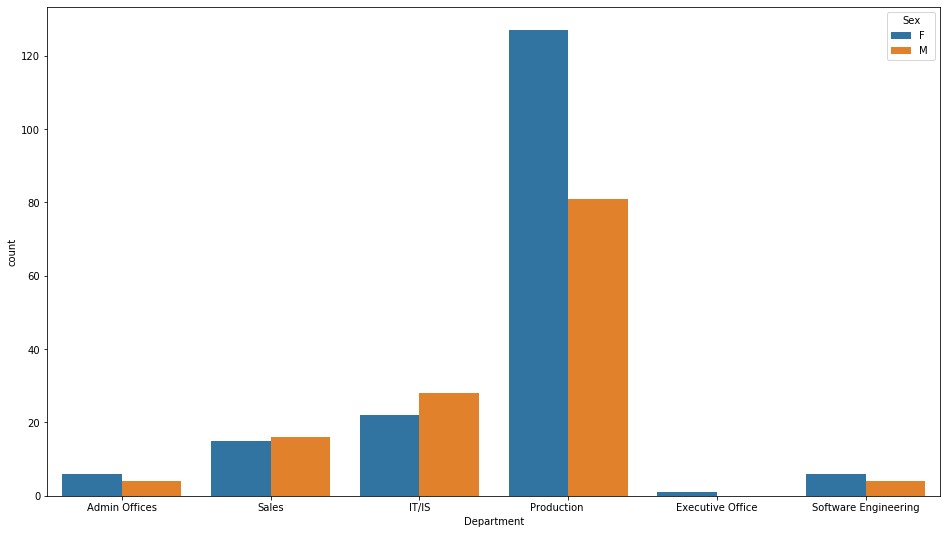

In [11]:
# Gender diversity across departmets
import seaborn as sns # import seabron library for better visualization.
plt.figure(figsize=(16,9)) # set figure size.
ax=sns.countplot(x=df['Department'],hue=df['Sex']) # plot of different departments vs the count of Males and Females in each.
plt.show()

### Conclusions from graph :

No males in executive office. Gender diversity is not maintained in production department and software engineering.(No.of females is nearly double the number of males)

#### Other Graphs

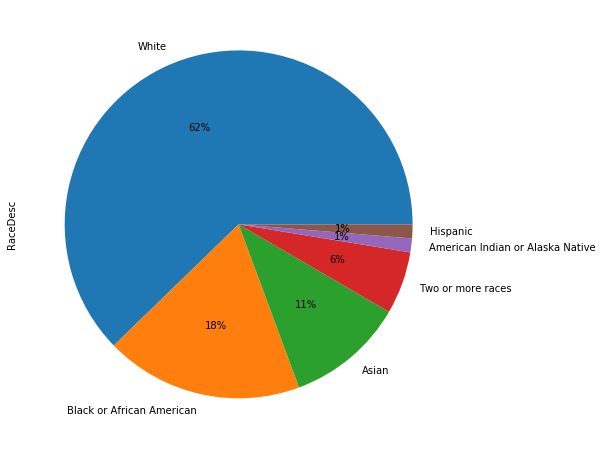

In [12]:
plt.figure(figsize=(8,8))
df['RaceDesc'].value_counts().plot(kind='pie',autopct='%1.0f%%') # Pie chart representation of different Races of people.

In [13]:
df['CitizenDesc'].unique() # Names of unique citizenship type.

array(['US Citizen', 'Eligible NonCitizen', 'Non-Citizen'], dtype=object)

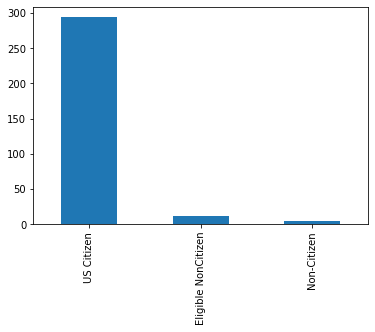

In [14]:
df['CitizenDesc'].value_counts().plot(kind='bar')
plt.show()

In [15]:
df['DOB'] = pd.to_datetime(df['DOB']) # convert DOB (date of birth) data to standard from of "datetime" datatype.

In [16]:
df['DOB'].head() # we can see below the dtype is datetime64.

0   1987-11-24
1   1984-04-26
2   1986-09-01
3   1985-09-16
4   1988-05-19
Name: DOB, dtype: datetime64[ns]

In [17]:
today = pd.to_datetime('today') # today's date and time.

In [18]:
today

Timestamp('2020-03-30 22:46:41.058610')

In [19]:
from datetime import datetime as dt # import datetime module.
df['Age'] = (today.year - df['DOB'].dt.year) # the age (in years) is "DOB" subtracted from today's date.

In [20]:
df['Age'].head() # have a look at the new age column.

0    33
1    36
2    34
3    35
4    32
Name: Age, dtype: int64

In [21]:
df['DateofHire'] = pd.to_datetime(df['DateofHire']) # similar conversion of date of hire to standard "datetime" datatype
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

In [22]:
# calculate how many years the employee has spent with company by calculating the subtraction of date of hire from today's date
df['DateofHire'] = (today.year - df['DateofHire'].dt.year)
df['DateofTermination'] = (today.year - df['DateofTermination'].dt.year)

In [23]:
print(df['DateofHire'].head())
print(df['DateofTermination'].head())

0    12
1     6
2     6
3     5
4     5
Name: DateofHire, dtype: int64
0    NaN
1    NaN
2    NaN
3    5.0
4    NaN
Name: DateofTermination, dtype: float64


In [24]:
df['DateofTermination'] = df['DateofTermination'].fillna(0) # the null values are filled with zero.

In [25]:
print(df['DateofTermination'].head())

0    0.0
1    0.0
2    0.0
3    5.0
4    0.0
Name: DateofTermination, dtype: float64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               310 non-null    object        
 1   EmpID                       310 non-null    int64         
 2   MarriedID                   310 non-null    int64         
 3   MaritalStatusID             310 non-null    int64         
 4   GenderID                    310 non-null    int64         
 5   EmpStatusID                 310 non-null    int64         
 6   DeptID                      310 non-null    int64         
 7   PerfScoreID                 310 non-null    int64         
 8   FromDiversityJobFairID      310 non-null    int64         
 9   PayRate                     310 non-null    float64       
 10  Termd                       310 non-null    int64         
 11  PositionID                  310 non-null    int64         

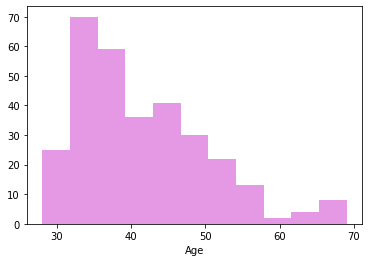

In [27]:
sns.distplot(df['Age'],kde=False,color='m')
plt.show()

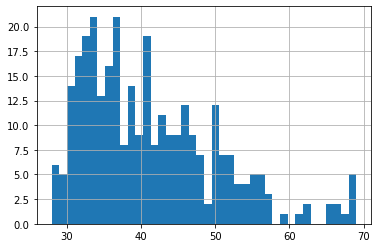

In [28]:
df['Age'].hist(bins=40)

In [29]:
df['Position'].unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Architect',
       'Database Administrator', 'Data Analyst', 'Data Analyst ',
       'Director of Operations', 'Director of Sales', 'IT Director',
       'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support',
       'IT Support', 'Network Engineer', 'President & CEO',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Enterprise Architect', 'Principal Data Architect',
       'Sr. Network Engineer'], dtype=object)

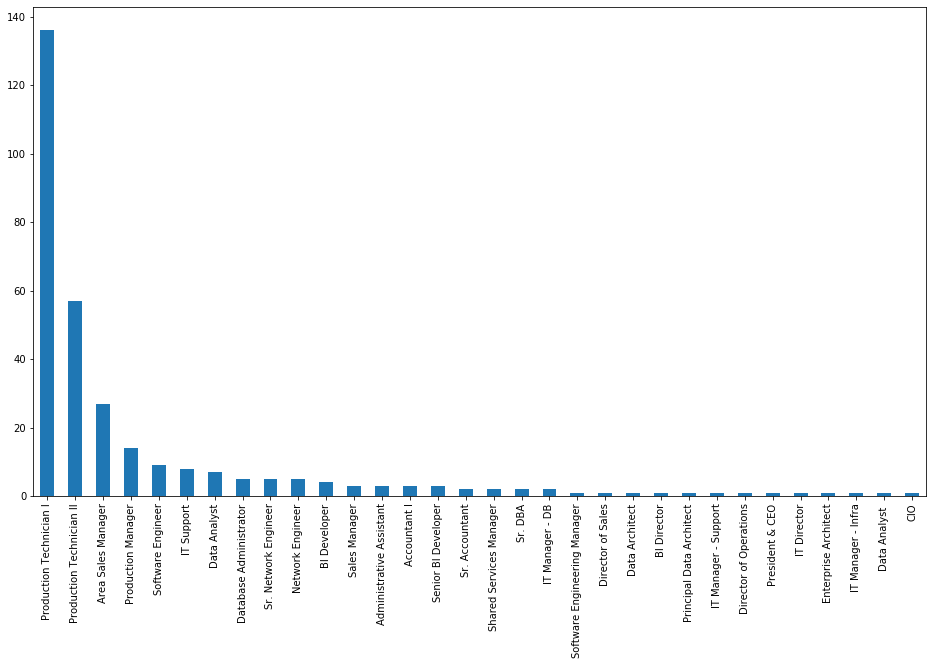

In [30]:
plt.figure(figsize=(16,9))
df['Position'].value_counts().plot(kind='bar')

In [31]:
df['PayRate'].describe()

count    310.000000
mean      31.284806
std       15.383615
min       14.000000
25%       20.000000
50%       24.000000
75%       45.315000
max       80.000000
Name: PayRate, dtype: float64

In [32]:
df['Age'].describe()

count    310.00000
mean      41.43871
std        8.86839
min       28.00000
25%       34.00000
50%       40.00000
75%       47.00000
max       69.00000
Name: Age, dtype: float64

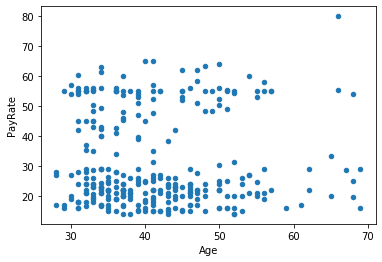

In [33]:
df.plot(x='Age',y='PayRate',kind='scatter')
# Looks like thery are not related! 

In [34]:
df['ManagerName'].unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater'],
      dtype=object)

In [35]:
df['PerformanceScore'].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   12
Name: PerformanceScore, dtype: int64

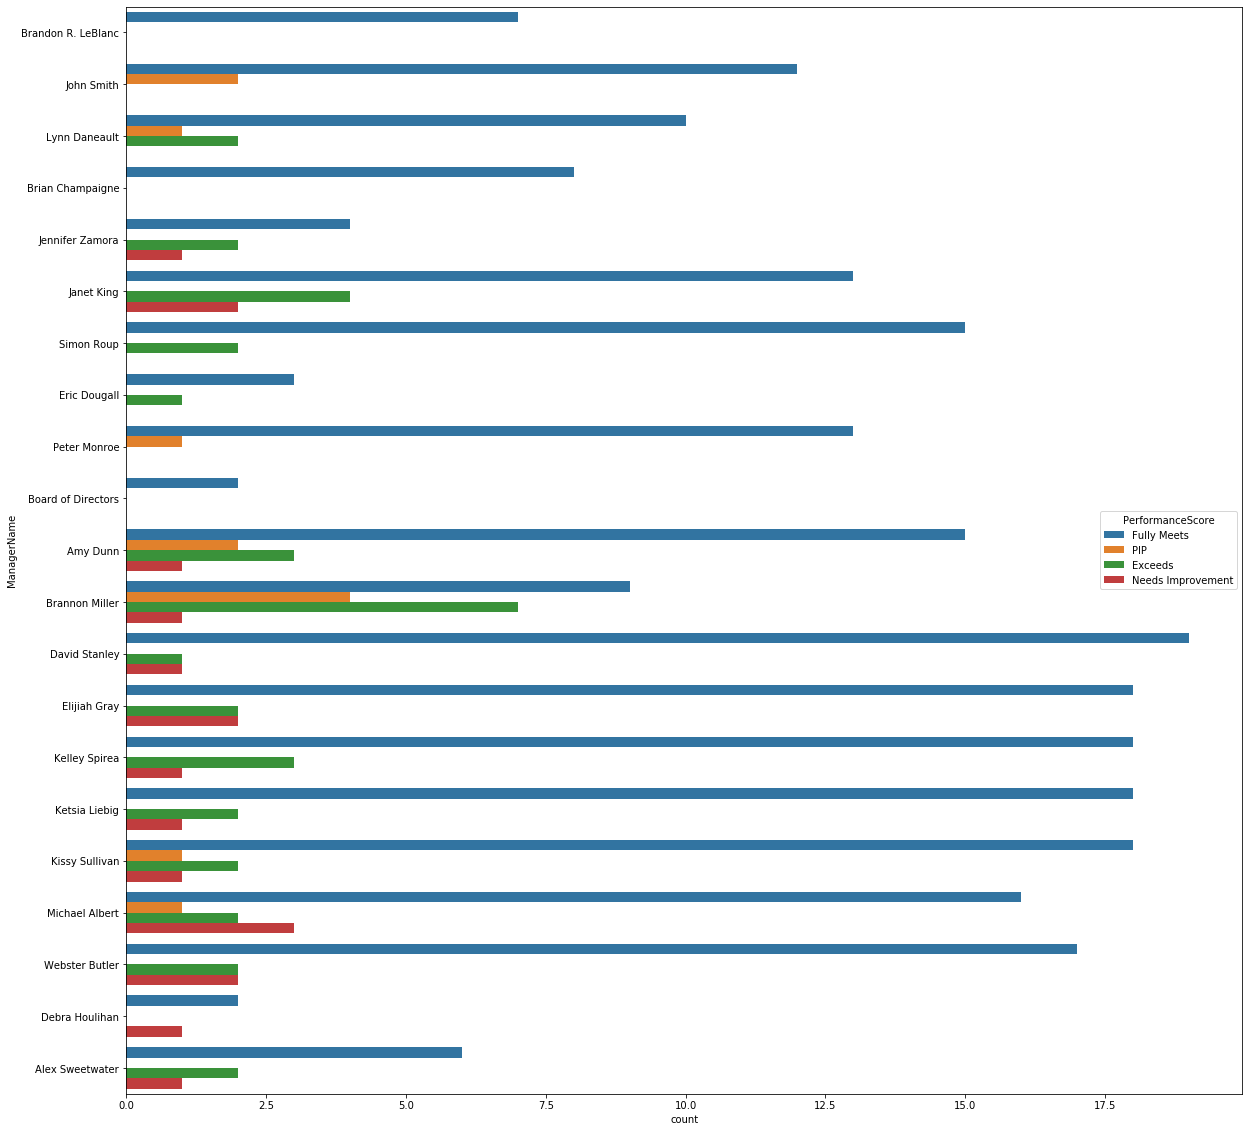

In [36]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['ManagerName'], hue=df['PerformanceScore'])

- Davind Stanley has the highest number of employees who fully meet the expectation.
- Brannon has the highest number of exceptional employess!
- Employees working with Michael need to improve their performance.

#### Which department pays more?

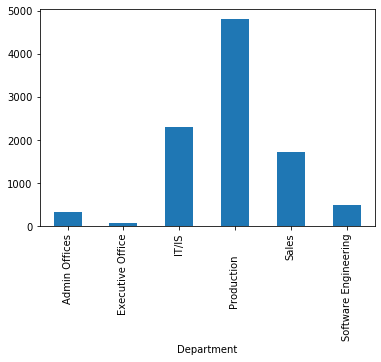

In [37]:
df.groupby('Department')['PayRate'].sum().plot(kind='bar')
#Production department pays more!

Which position gives away more money? This doesn't mean that all employees in this position get maximum pay. The number of employees could be more for this dept. Note that we are taking sum of pay rate for each department.

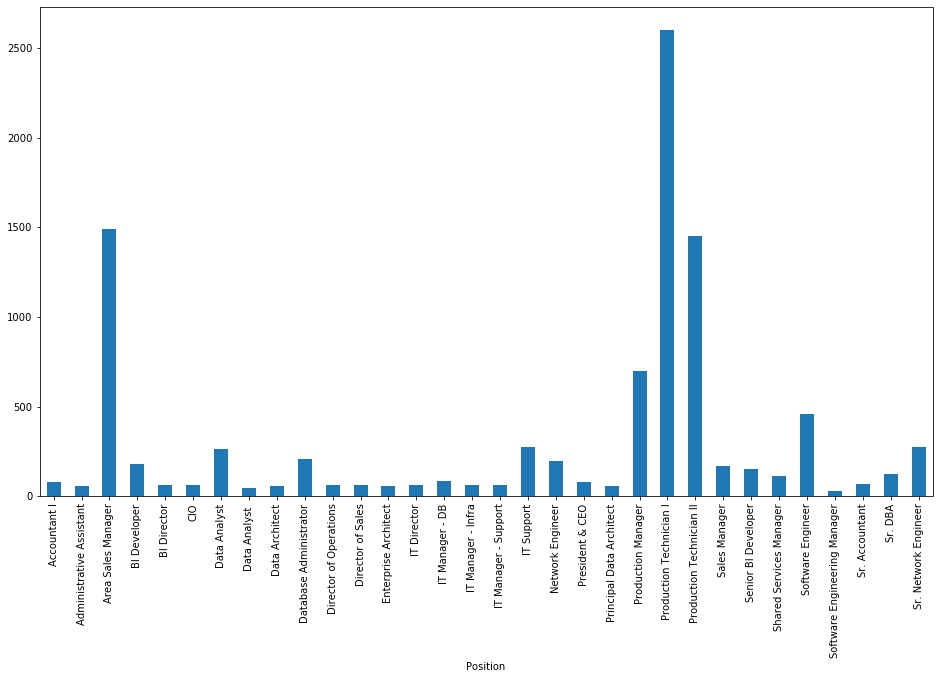

In [38]:
plt.figure(figsize=(16,9))
df.groupby('Position')['PayRate'].sum().plot(kind='bar')
# by looking at the graph, we can see that "Production Technician I" gets the highest pay.

Who gets the highest salary ?

In [39]:
id_of_person_with_highgest_pay = df['PayRate'].idxmax()
df.loc[id_of_person_with_highgest_pay]


# df.loc[df['PayRate'].idxmax()]

Employee_Name                                   King, Janet
EmpID                                            1001495124
MarriedID                                                 1
MaritalStatusID                                           1
GenderID                                                  0
EmpStatusID                                               1
DeptID                                                    2
PerfScoreID                                               3
FromDiversityJobFairID                                    0
PayRate                                                  80
Termd                                                     0
PositionID                                               16
Position                                    President & CEO
State                                                    MA
Zip                                                    1902
DOB                           1954-09-21T00:00:00.000000000
Sex                                     

In [40]:
HispLat_map ={'No': 0, 'Yes': 1, 'no': 0, 'yes': 1} # convert "HispanicLatino" to more suitable values.
df['HispanicLatino'] = df['HispanicLatino'].replace(HispLat_map)
df['HispanicLatino'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: HispanicLatino, dtype: int64

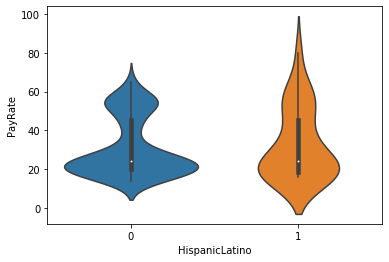

In [41]:
sns.violinplot('HispanicLatino', 'PayRate', data = df)

### Following are different types of plots.
- Plot a Bar Chart of the count of Marital Status.
- Plot a bar chart of Employment status group by Martial Status.

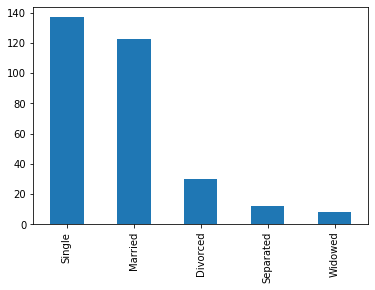

In [42]:
df['MaritalDesc'].value_counts().plot(kind='bar')

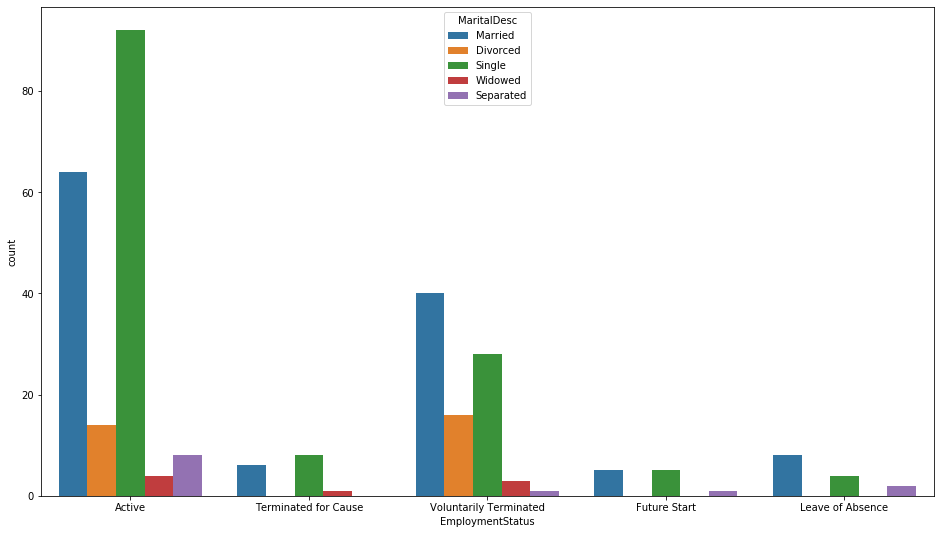

In [43]:
plt.figure(figsize=(16,9))
ax=sns.countplot(x=df['EmploymentStatus'],hue=df['MaritalDesc'])

In [44]:
df['TermReason'].nunique()

17

In [45]:
columns_to_drop = ['Employee_Name', 'EmpID', 'DOB', 'Zip', 'LastPerformanceReview_Date', 'DaysLateLast30']
df = df.drop(columns_to_drop, axis = 1) 

In [46]:
df1 = pd.get_dummies(df, drop_first=True)

In [47]:
df1.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,...,RecruitmentSource_Pay Per Click - Google,RecruitmentSource_Professional Society,RecruitmentSource_Search Engine - Google Bing Yahoo,RecruitmentSource_Social Networks - Facebook Twitter etc,RecruitmentSource_Vendor Referral,RecruitmentSource_Website Banner Ads,RecruitmentSource_Word of Mouth,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,1,1,0,1,1,3,1,28.50,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,1,1,3,0,23.00,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,3,0,29.00,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,1,3,0,21.50,1,2,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,1,3,0,16.56,0,2,...,0,0,0,0,0,1,0,1,0,0


In [48]:
X = df1.drop('PayRate', axis=1)
y = df1['PayRate']

In [49]:
X.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,HispanicLatino,...,RecruitmentSource_Pay Per Click - Google,RecruitmentSource_Professional Society,RecruitmentSource_Search Engine - Google Bing Yahoo,RecruitmentSource_Social Networks - Facebook Twitter etc,RecruitmentSource_Vendor Referral,RecruitmentSource_Website Banner Ads,RecruitmentSource_Word of Mouth,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,1,1,0,1,1,3,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,1,1,1,3,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,1,3,0,1,2,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,1,3,0,0,2,0,...,0,0,0,0,0,1,0,1,0,0


In [50]:
y.head()

0    28.50
1    23.00
2    29.00
3    21.50
4    16.56
Name: PayRate, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [52]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [53]:
y_pred = regressor.predict(X_test) 

In [54]:
regressor_score = regressor.score(X_train, y_train)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',regressor_score)

coefficient of determination R^2 of the prediction.:  1.0


In [56]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 65.31
Test Variance score: 0.77


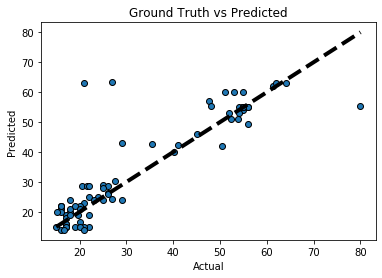

In [57]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# Conclusion
- We can see that our R2 score and MSE are both very good. 
- This means that we have found a good fitting model to predict the Pay Rate of an employee. 
- There can be a further improvement to the metric by doing some preprocessing before fitting the data. 
- However, the task of the post was to provide you with enough knowledge to implement your first model. 
- You can build over the existing pipeline and report your accuracies.